In [2]:
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#rom tensorflow.keras.callbacks import TensorBoard
import time

In [3]:
train_path = "C:/Users/admin/Documents/Material/BTECH PROJECT/CustomData/Custom"
def create_train_gen():
    train_datagen = ImageDataGenerator(
        rescale = 1./255,
        preprocessing_function = tf.keras.applications.vgg16.preprocess_input,
        shear_range = 0.2,
        zoom_range = 0.2,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
    )
    
    train_generator = train_datagen.flow_from_directory(
        directory = train_path,
        target_size = (180, 180),
        class_mode = 'binary',
        batch_size = 16,
        subset = 'training'
    )
    
    return train_generator
X_train = create_train_gen()

Found 3008 images belonging to 2 classes.


In [4]:
def create_valid_gen():
    valid_datagen = ImageDataGenerator(
        rescale = 1./255,
        preprocessing_function = tf.keras.applications.vgg16.preprocess_input,
        validation_split = 0.1
    )
    
    valid_generator = valid_datagen.flow_from_directory(
        directory = train_path,
        target_size = (180, 180),
        class_mode = 'binary',
        batch_size = 16,
        subset = 'validation'
    )
    return valid_generator

X_valid = create_valid_gen()

Found 300 images belonging to 2 classes.


In [5]:
len(X_train)

188

In [6]:
# Name = "GarbageDetectionModel-{}".format(time.time())
# tensorboard = TensorBoard(log_dir = "logs/{}".format(Name))

In [7]:
model = Sequential()

model.add(Conv2D(256, (7, 7), activation = 'relu', strides = (2, 2), input_shape = (180, 180, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (5, 5), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu', strides = (2, 2)))
model.add(MaxPooling2D(pool_size = (2, 2)))
          
model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 87, 87, 256)       37888     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 43, 43, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 39, 39, 128)       819328    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 19, 19, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0

In [8]:
md = model.fit(X_train, epochs = 30, validation_data = X_valid)

Epoch 1/30
188/188 [==============================] - 602s 3s/step - loss: 0.6467 - accuracy: 0.5694 - val_loss: 0.5780 - val_accuracy: 0.7033
Epoch 2/30
112/188 [================>.............] - ETA: 5:12 - loss: 0.5958 - accuracy: 0.6918

KeyboardInterrupt: 

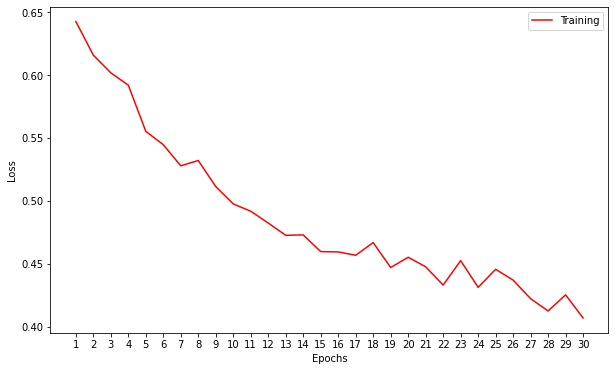

In [64]:
import matplotlib.pyplot as plt
l = len(md.history['loss'])
epochs = range(1, l+1)

fig1 = plt.figure(figsize=(10,6))
plt.plot(epochs,md.history['loss'],c="red",label="Training")
#plt.plot(epochs,md.history['val_loss'],c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()

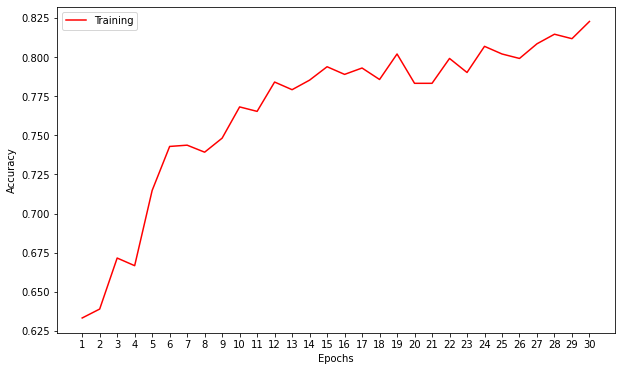

In [65]:
import matplotlib.pyplot as plt
l = len(md.history['loss'])
epochs = range(1, l+1)

fig1 = plt.figure(figsize=(10,6))
plt.plot(epochs,md.history['accuracy'],c="red",label="Training")
#plt.plot(epochs,md.history['val_accuracy'],c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs)
plt.legend()